<a href="https://colab.research.google.com/github/sushant21csu463/RLLAB/blob/main/RL_Bandit_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 55. 119.  18.  16. 765.  11.  16.]
[1000.    0.    0.    0.    0.    0.    0.]


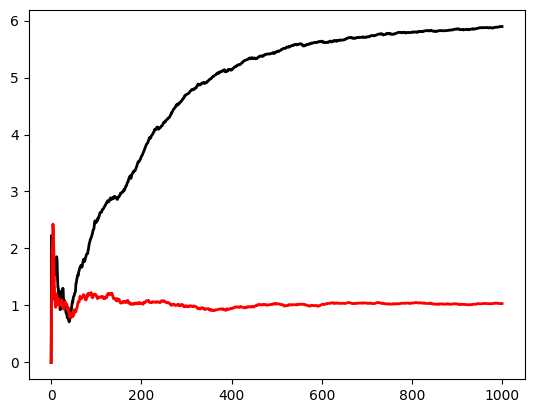

In [ ]:
#Greedy
import numpy as np
import matplotlib.pyplot as plt

class BanditProblem:
    def __init__(self, trueActionValues, epsilon, totalSteps):
        self.armNumber = np.size(trueActionValues)
        self.epsilon = epsilon
        self.currentStep = 0
        self.numberOfTimesArmSelected = np.zeros(self.armNumber)
        self.totalSteps = totalSteps
        self.trueActionValues = trueActionValues
        self.armMeanRewards = np.zeros(self.armNumber)
        self.currentReward = 0
        self.meanReward = np.zeros(totalSteps+1)

    def epsilonGreedySelectActions(self):
        probabiltyDraw = np.random.rand()
        if (self.currentStep==0) or (probabiltyDraw<=self.epsilon):
            selectedArmIndex = np.random.choice(self.armNumber)
        if (probabiltyDraw>self.epsilon):
            selectedArmIndex = np.argmax(self.armMeanRewards)
        self.currentStep+=1
        self.numberOfTimesArmSelected[selectedArmIndex] = self.numberOfTimesArmSelected[selectedArmIndex] + 1
        self.currentReward = np.random.normal(self.trueActionValues[selectedArmIndex],2)
        self.meanReward[self.currentStep] = self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])
        self.armMeanRewards[selectedArmIndex]=self.armMeanRewards[selectedArmIndex]+(1/(self.numberOfTimesArmSelected[selectedArmIndex]))*(self.currentReward-self.armMeanRewards[selectedArmIndex])


    def greedySelectActions(self):
        probabiltyDraw = np.random.rand()
        if (self.currentStep==0) or (probabiltyDraw<=0):
            selectedArmIndex = np.random.choice(self.armNumber)
        if (probabiltyDraw>0):
            selectedArmIndex = np.argmax(self.armMeanRewards)
        self.currentStep+=1
        self.numberOfTimesArmSelected[selectedArmIndex] = self.numberOfTimesArmSelected[selectedArmIndex] + 1
        self.currentReward = np.random.normal(self.trueActionValues[selectedArmIndex],2)
        self.meanReward[self.currentStep] = self.meanReward[self.currentStep-1]+(1/(self.currentStep))*(self.currentReward-self.meanReward[self.currentStep-1])
        self.armMeanRewards[selectedArmIndex]=self.armMeanRewards[selectedArmIndex]+(1/(self.numberOfTimesArmSelected[selectedArmIndex]))*(self.currentReward-self.armMeanRewards[selectedArmIndex])

    def greedyplayGame(self):
        for i in range(self.totalSteps):
            self.greedySelectActions()
        print(self.numberOfTimesArmSelected)
    def epsilonplayGame(self):
        for i in range(self.totalSteps):
            self.epsilonGreedySelectActions()
        print(self.numberOfTimesArmSelected)
epsilon=0.1
totalSteps=1000
actionValues=np.array([1,4,2,0,7,1,-1])
Bandit1=BanditProblem(actionValues, epsilon, totalSteps)
Bandit1.epsilonplayGame()
Bandit2=BanditProblem(actionValues, 0, totalSteps)
Bandit2.greedyplayGame()
GreedyMeanReward = Bandit2.meanReward
MeanReward=Bandit1.meanReward
plt.plot(np.arange(totalSteps+1),MeanReward,linewidth=2, color='k', label='epsilon =0.1')
plt.plot(np.arange(totalSteps+1),GreedyMeanReward,linewidth=2, color='r', label='greedy')
plt.show()



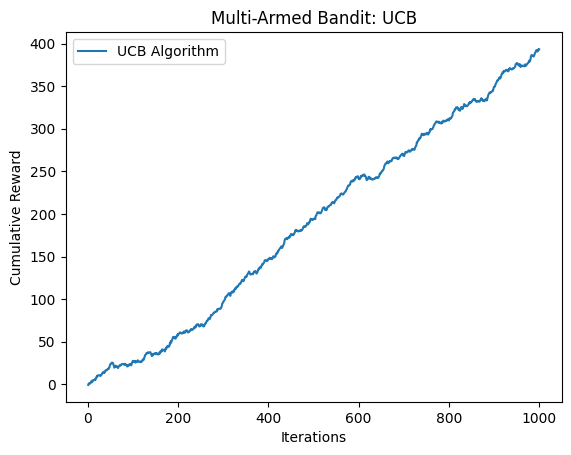

In [ ]:
#UCB
import numpy as np
import matplotlib.pyplot as plt

num_arms = 5

true_means = np.random.normal(0, 1, num_arms)

num_iterations = 1000
num_selections = np.zeros(num_arms)
sum_rewards = np.zeros(num_arms)
ucb_rewards = []

for t in range(1, num_iterations + 1):
    arm_to_pull_ucb = np.argmax(sum_rewards / (num_selections + 1e-6)
    + np.sqrt(2 * np.log(t) / (num_selections + 1e-6)))
    reward_ucb = np.random.normal(true_means[arm_to_pull_ucb], 1)
    sum_rewards[arm_to_pull_ucb] += reward_ucb
    num_selections[arm_to_pull_ucb] += 1
    ucb_rewards.append(reward_ucb)

cumulative_ucb_rewards = np.cumsum(ucb_rewards)

plt.plot(range(1, num_iterations + 1), cumulative_ucb_rewards, label='UCB Algorithm')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Multi-Armed Bandit: UCB')
plt.show()

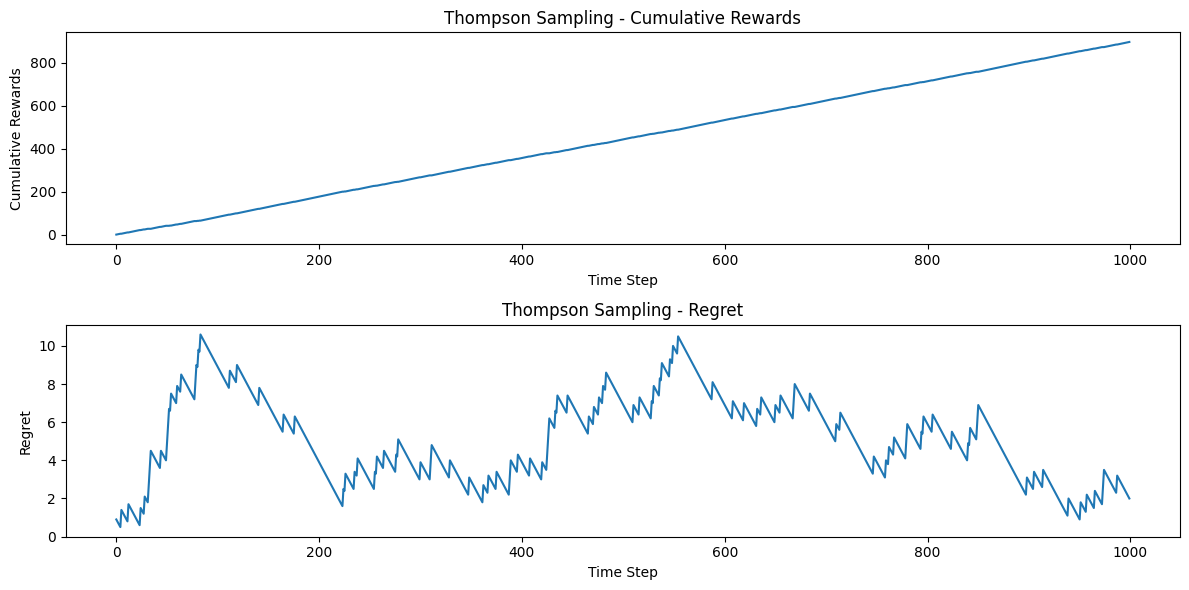

In [ ]:
#Thompson
import numpy as np
import matplotlib.pyplot as plt

num_arms = 3
true_probabilities = [0.9, 0.8, 0.7]
num_steps = 1000
num_pulls = np.zeros(num_arms)
num_rewards = np.zeros(num_arms)
cumulative_rewards = []
regret = []
for step in range(num_steps):

    sampled_probabilities = [np.random.beta(num_rewards[i] + 1, num_pulls[i] - num_rewards[i] + 1) for i in range(num_arms)]
    chosen_arm = np.argmax(sampled_probabilities)
    reward = np.random.binomial(1, true_probabilities[chosen_arm])
    num_pulls[chosen_arm] += 1
    num_rewards[chosen_arm] += reward
    cumulative_rewards.append(sum(num_rewards))
    optimal_reward = max(true_probabilities) * (step + 1)
    regret.append(optimal_reward - sum(num_rewards))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cumulative_rewards)
plt.xlabel('Time Step')
plt.ylabel('Cumulative Rewards')
plt.title('Thompson Sampling - Cumulative Rewards')

plt.subplot(2, 1, 2)
plt.plot(regret)
plt.xlabel('Time Step')
plt.ylabel('Regret')
plt.title('Thompson Sampling - Regret')

plt.tight_layout()
plt.show()
